In [2]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101346 sha256=11bc80b698c2225f0b508c5ddbeb6d7a0d2639cc9e0cc6f24fbc44920bcbc893
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary


In [5]:
!pip install google-colab

  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102298 sha256=e6b544c6dbc196a2ff7d24fa03162a33d7bcc39f08ec61cef0e88d9967033dc4
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\f6\3b\58\f34ea9045a7c69bd5634978bf25ac60277e90997d9e6e74192
  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13370 sha256=fe3ade9614db29213c93747f090a11c3b726abd6c5f03065abd8b26e2caac67b
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\73\0c\f5\35977446e45e818e6b848be3d41e7f38298a5102f4dcda21c6
  Created wheel for tornado: filename=tornado-4.5.3-cp37-cp37m-win_amd64.whl size=420780 sha256=5c1e065f734a931bd53be5e858eb4cbb7bfe67386ad8ec3454bdd18343747740
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\a2\45\43\36ec7a893e16c1212a6b1505ded0a2d73cf8e863a0227c8e04
Successfully built google-colab portpicker tornado
  Attempting uninstall: six
    Found existing insta

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: astroid 2.3.3 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: tensorboard 2.2.1 has requirement google-auth<2,>=1.6.3, but you'll have google-auth 1.4.2 which is incompatible.
ERROR: spyder-kernels 1.8.1 has requirement ipykernel>=5.1.3; python_version > "2", but you'll have ipykernel 4.6.1 which is incompatible.
ERROR: jupyter-console 6.1.0 has requirement prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.18 which is incompatible.
ERROR: google-api-core 1.17.0 has requirement google-auth<2.0dev,>=1.14.0, but you'll have google-auth 1.4.2 which is incompatible.
ERROR: distributed 2.11.0 has requirement tornado>=5; python_version < "3.8", but you'll have tornado 4.5.3 which is incompatible.
ERROR: Could not 

In [20]:
import glob
import pandas as pd

# get data file names
path =r'C:\lab_ccn_cert\MachineLearning'
filenames = glob.glob(path + "/noticias*.csv")

li = []

for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [28]:
df_news= frame
frame.head()

,titulo,detalle,cuerpo
0,\n Minsal adela...,['Gracias a la alerta sanitaria decretada en C...,['Una de las medidas adoptadas será adelantar ...
1,\n Revocan alza...,['La Superintendencia de Salud revocó el alza ...,"['En tanto, quienes no se acogieron a este rec..."
2,\n Hospital Reg...,['El Hospital Regional de Concepción debió act...,"['En tanto, la Seremi de Salud de la Región de..."
3,\n Hospital de ...,['El Hospital de la Fuerza Aérea de Chile (FAC...,['El centro asistencia de la FACh está a la es...
4,\n Alcalde de ...,"['El alcalde de Santiago, Felipe Alessandri, a...",['El 30% de los fallecimientos en nuestro país...


In [29]:
frame.shape

(611, 3)

In [30]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   titulo   611 non-null    object
 1   detalle  611 non-null    object
 2   cuerpo   611 non-null    object
dtypes: object(3)
memory usage: 14.4+ KB


### Data Preprocessing

In [31]:
black_list = ['más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a', 'compa', 'acompa', 'off', 'and', 'grecia', 'the','it', 'to',
              'd',  'et',  'dame',  'il',  'dans', 'that',  'as',   'for',  'it',  'elections',  'would',  'this',  'with', 'york', 'obama', 'chavez', 'gadafi']

In [32]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

#### Create the function for select only nouns for our data, this way we are removing adverb, adjetives, verbs, etc. This is doing with spacy

In [33]:
def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out

For gensim we need a list of text, so we need do convert the dataframe to list

In [34]:
len(df_news.cuerpo.to_list())

611

In [36]:
%%time
bigram = gensim.models.Phrases(df_news.cuerpo.to_list()) 

Wall time: 2.78 s


In [40]:
bigram[df_news.cuerpo.to_list()[610].split()]

['El',
 'jefe',
 'comunal',
 'declaró',
 'al',
 'diario',
 'La',
 'Tercera',
 'que',
 'la',
 'iniciativa',
 'la',
 'planteó',
 'hace',
 'dos',
 'años,',
 'y',
 'contó',
 'que',
 'ya',
 'está',
 'listo',
 'el',
 'convenio',
 'con',
 'el',
 'Sename',
 'para',
 'empezar',
 'a',
 "operar.',",
 "'(adsbygoogle",
 '=',
 'window.adsbygoogle',
 '||',
 "[]).push({});',",
 '"',
 'googletag.cmd.push(function()',
 '{',
 "googletag.display('div-gpt-ad-2246448-2');",
 '});",',
 "'\\xa0Hemos",
 'llegado',
 'a',
 'la',
 'conclusión',
 'de',
 'que',
 'ningún',
 'hogar',
 'privado',
 'puede',
 'ofrecer',
 'a',
 'los',
 'niños,',
 'por',
 'más',
 'plata',
 'que',
 'le',
 'pasen,',
 'lo',
 'que',
 'una',
 'municipalidad',
 'les',
 'puede',
 'ofrecer.',
 'Por',
 'lo',
 'tanto,',
 'estamos',
 'proponiendo',
 'que',
 'el',
 'Sename',
 'sea',
 'municipalizado,',
 'que',
 'todas',
 'las',
 'comunas',
 'cuenten',
 'con',
 'hogares',
 'municipales',
 'para',
 'tener',
 'a',
 'nuestros',
 'niños',
 'bajo',
 'prote

In [41]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

 We are using Spacy For lemmatize spanish words

In [47]:
!pip install spacy

  Using cached spacy-2.2.4-cp37-cp37m-win_amd64.whl (9.9 MB)


In [49]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-deps

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.0.0-py3-none-any.whl size=37405980 sha256=a629d91653582ef66aa6293d4fcb93696dd474fbf12376e1965c3815b52e44fe
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\51\df\77\250d8a622c7fc066a42ea4238279337e4a5e04c2602c448ea5
Successfully built en-core-web-sm


In [56]:
import spacy
nlp = spacy.load(r'C:\Users\administrator\Documents\Curso_Machine\es_core_news_md-2.2.5\es_core_news_md\es_core_news_md-2.2.5')

In [60]:
df_news.cuerpo[0]

'[\'Una de las medidas adoptadas será adelantar la entrega de cinco hospitales a nivel nacional: Viña del Mar, Angol, Ovalle, Padre Las Casas y Félix Bulnes en Santiago.\', \'     (adsbygoogle = window.adsbygoogle || []).push({});\', "    googletag.cmd.push(function() { googletag.display(\'div-gpt-ad-2246448-2\'); });", \'Arturo Zúñiga, subsecretario de Redes Asistenciales, detalló que si tenemos una situación similar a la de 2009, con las tasas de hospitalización que ha tenido este virus y que informa China, es probable que contemos con estas camas de forma adelantada. La alerta sanitaria nos permite esto, porque uno tiene la salud de la ciudadanía de por medio, según consigna La Tercera.\', \'En la misma línea, Zúñiga explicó que implementar estos hospitales nos permitirá disponer de 1.762 camas para este invierno, cuando es más probable que ocurran contagios por los temas característicos del invierno: más frío y hacinamiento, etc.\', \'En el caso del Hospital Félix Bulnes, este será

In [59]:
cleaner(df_news.cuerpo[0])

['medidas',
 'entrega',
 'hospitales',
 'nivel',
 'padre',
 'casas',
 'situacion',
 'tasas',
 'virus',
 'camas',
 'forma',
 'alerta',
 'salud',
 'hospitales',
 'camas',
 'invierno',
 'temas',
 'invierno',
 'semanas',
 'abril',
 'atendera',
 'casos',
 'coronavirus',
 'recintos',
 'abril',
 'padre',
 'casas',
 'julio',
 'subsecretario',
 'elementos',
 'seguridad',
 'funcionarios',
 'medicina',
 'estudiantes',
 'caso',
 'acordo',
 'camas',
 'proveedores',
 'test',
 'resultados',
 'examenes',
 'horas']

In [61]:
df_news['text2'] = df_news['cuerpo']

In [62]:
%%time
df_news['cuerpo'] = df_news['cuerpo'].apply(cleaner)

Wall time: 29.2 s


In [63]:
dictionary = Dictionary(df_news['cuerpo'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['cuerpo'].to_list()]

#### Now let's do the modeling part
We are comparing 3 topic modeling algorithm Latent Dirichlet Allocation (LDA), Latent semantic analysis (LSA), Hierarchical Dirichlet Process (HDP),in order to evaluate topic models we will be using topic coherence, which is a measure of how interpretable topics are for human beings.

In [64]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

and the topics of this model:

In [65]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [66]:
# hdpmodel.show_topics() 

display_topics(hdpmodel, model_type="hdp")

Topic 0:
parte  familia  personas  restos  alza  partido  resultado  marzo  forma  casa 

Topic 1:
medidas  caso  coronavirus  casos  momento  riesgo  millones  consensos  noticias  contactos 

Topic 2:
delitos  denuncias  periodo  respecto  misterios  cifras  racionamiento  ilegalidades  caso  octubre 

Topic 3:
terminos  opciones  cientificas  febrero  barcazas  tripulantes  necesidad  fruto  partitura  compromiso 

Topic 4:
ensayo  producto  extracciones  productor  fallecimiento  familia  eventos  redes  formas  hipocresia 

Topic 5:
seguridad  cautela  participacion  masa  bandas  parametros  boleto  dotaciones  barrios  carabineros 

Topic 6:
turismo  equipos  multas  agente  aparicion  ciencias  millones  tejemanejes  ganas  plantas 

Topic 7:
cuestiones  funciones  domingo  cambio  inundaciones  coronavirus  momento  mercado  euros  tortilla 

Topic 8:
agua  tema  importancia  parte  habitantes  recurso  ente  invierno  lentitud  cantante 

Topic 9:
telefonazo  vez  fichajes  v

as we could see there are 20 topics, however is kind of dificult to interpret or follow, so we decide to move to another model.

In [67]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

## LSI MODEL

In [68]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [69]:
display_topics(lsimodel)  # Showing the topics

Topic 0:
personas parte tambien caso coronavirus medidas casos mujeres tipo forma 

Topic 1:
delitos periodo respecto cifras coronavirus derechos denuncias octubre prisiones ilegalidades 

Topic 2:
coronavirus parte medidas casos mujeres riesgo caso delitos casa dia 

Topic 3:
juego bar partidos sistema entrenador coronavirus parte equipos jugadores partido 

Topic 4:
juego mujeres bar coronavirus partidos sistema agua caso tambien casa 

Topic 5:
agua presidente ejemplo tema animales acuerdo mosquitos euros personas naturaleza 

Topic 6:
mujeres agua caso mujer presidente parte millones euros gente medidas 

Topic 7:
mujeres agua ejemplo violencia coronavirus tema mujer animales habitantes millones 

Topic 8:
mujeres cabeza millones gente caso euros presidente violencia medidas agua 

Topic 9:
presidente acuerdo gente euros cabeza violencia millones elecciones partido forma 



It seen that with 10 topics there is some themes with keywords related to: trump, venezuela, police, electiones, terrorism; still is a little difficult to gt some insight, because of this we are trying to select the best number of topics by iterate over a range of values and looking the coherence

In [77]:
import matplotlib.pyplot as plt

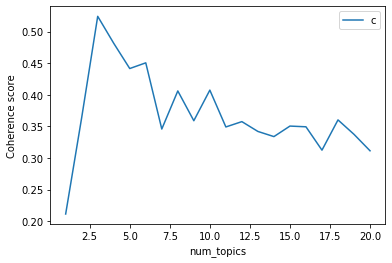

Wall time: 3min 39s


In [70]:
%%time
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['cuerpo'].to_list(), limit=21, model= "lsi")

In [71]:
display_topics(lmlist_lsi[2])

Topic 0:
personas parte tambien caso coronavirus medidas casos mujeres tipo forma 

Topic 1:
delitos periodo respecto cifras coronavirus derechos denuncias octubre prisiones ilegalidades 

Topic 2:
coronavirus parte medidas casos mujeres riesgo caso delitos casa dia 



Now, Let's try another model

#### Latent Dirichlet Allocation Model

In [72]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [74]:
display_topics(ldamodel)

Topic 0:
coronavirus tipo millones personas virus medidas equipo tambien forma riesgo 

Topic 1:
personas violencia momento medidas tambien semana horas tiempo parte presidente 

Topic 2:
presidente parte tambien acuerdo persona elecciones horas casa equipo meses 

Topic 3:
caso coronavirus casos riesgo personas medidas parte tambien tipo euros 

Topic 4:
euros tambien delitos cifras personas mes serie millones marzo dia 

Topic 5:
mujeres tambien parte mujer personas mundo medidas tema muerte marzo 

Topic 6:
numeros lugar proceso combinacion personas horas sistema parte dia licitacion 

Topic 7:
tambien mujeres personas marzo mujer caso vez parte forma violencia 

Topic 8:
coronavirus casos medidas lugar tambien parte personas noticias horas grupo 

Topic 9:
respecto tambien caso parte personas delitos horas casos medidas presidente 



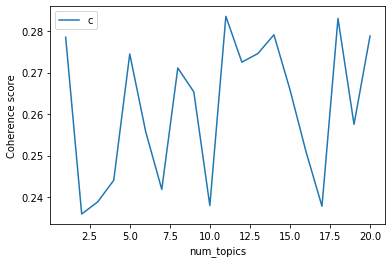

Wall time: 3min 51s


In [76]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['cuerpo'].to_list(), limit=21, model= "lda")

Comparing the Model Coherence of the Best Models
we made 3 models, now let's compare each other's coherence

In [78]:
ldamodel = lmlist[11]
lsimodel = lmlist_lsi[2]

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [80]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['cuerpo'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['cuerpo'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['cuerpo'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

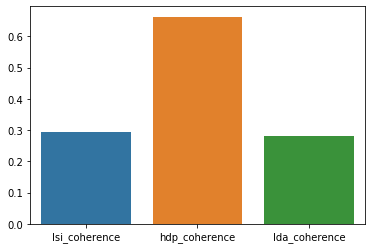

In [81]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

We can see that the LdaModel model with 8 topics has the higher value of coherence

Examine the keyword to get the topics of the best model

In [91]:
display_topics(hdpmodel, model_type="hdp")

Topic 0:
parte  familia  personas  restos  alza  partido  resultado  marzo  forma  casa 

Topic 1:
medidas  caso  coronavirus  casos  momento  riesgo  millones  consensos  noticias  contactos 

Topic 2:
delitos  denuncias  periodo  respecto  misterios  cifras  racionamiento  ilegalidades  caso  octubre 

Topic 3:
terminos  opciones  cientificas  febrero  barcazas  tripulantes  necesidad  fruto  partitura  compromiso 

Topic 4:
ensayo  producto  extracciones  productor  fallecimiento  familia  eventos  redes  formas  hipocresia 

Topic 5:
seguridad  cautela  participacion  masa  bandas  parametros  boleto  dotaciones  barrios  carabineros 

Topic 6:
turismo  equipos  multas  agente  aparicion  ciencias  millones  tejemanejes  ganas  plantas 

Topic 7:
cuestiones  funciones  domingo  cambio  inundaciones  coronavirus  momento  mercado  euros  tortilla 

Topic 8:
agua  tema  importancia  parte  habitantes  recurso  ente  invierno  lentitud  cantante 

Topic 9:
telefonazo  vez  fichajes  v

Classifiying all documents
now that we have been select the best model and topics number, is time to assign a topic to each document, means cluster according to the topics

In [88]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['cuerpo'].to_list())

In [89]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9787,"coronavirus, medidas, casos, personas, tambien...","[medidas, entrega, hospitales, nivel, padre, c..."
1,1,11.0,0.9461,"presidente, violencia, tambien, acuerdo, perso...","[reclamo, octubre, exceso, costos, carga, octu..."
2,2,7.0,0.9563,"caso, casos, riesgo, personas, coronavirus, pa...","[detecto, caso, acuerdo, criterios, familia, f..."
3,3,4.0,0.9771,"coronavirus, medidas, casos, personas, tambien...","[resultados, examen, casos, paciente, hospital..."
4,4,3.0,0.9813,"mujeres, agua, tambien, parte, mundo, horas, l...","[fallecimientos, enfermedades, acciones, ejerc..."
5,5,0.0,0.5410,"coronavirus, tambien, personas, medidas, caso,...","[semanas, protocolo, manejo, control, coronavi..."
6,6,0.0,0.6921,"coronavirus, tambien, personas, medidas, caso,...","[estudiante, transito, aislamiento, mascarilla..."
7,7,2.0,0.9918,"caso, coronavirus, medidas, tambien, euros, vi...","[enfermedad, causa, programa, frecuencia, sist..."
8,8,7.0,0.9859,"caso, casos, riesgo, personas, coronavirus, pa...","[popularidad, recintos, camping, actividades, ..."
9,9,10.0,0.9805,"presidente, parte, tambien, millones, ministro...","[instancia, exportaciones, mercados, producto,..."


We selected the ldamodel with 12 topics and asigned a dominant topic to each document, now let map each topic with a label

first let's create the dictionary

In [92]:
label_dicc = {0:'Politica', 1:'polit-corav', 2:'negociaciones', 3: 'viaje_bar',
              4:'life_family', 5:'sea_disasters', 6:'elections', 
              7:'terrorism', 8:'economic_crisis', 9: 'seism', 
              10:'peacy_treaty', 11:'airport_security'}

In [93]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')

In [94]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,life_family,0.9787,"coronavirus, medidas, casos, personas, tambien...","[medidas, entrega, hospitales, nivel, padre, c..."
1,1,airport_security,0.9461,"presidente, violencia, tambien, acuerdo, perso...","[reclamo, octubre, exceso, costos, carga, octu..."
2,2,terrorism,0.9563,"caso, casos, riesgo, personas, coronavirus, pa...","[detecto, caso, acuerdo, criterios, familia, f..."
3,3,life_family,0.9771,"coronavirus, medidas, casos, personas, tambien...","[resultados, examen, casos, paciente, hospital..."
4,4,protest,0.9813,"mujeres, agua, tambien, parte, mundo, horas, l...","[fallecimientos, enfermedades, acciones, ejerc..."
5,5,trials,0.5410,"coronavirus, tambien, personas, medidas, caso,...","[semanas, protocolo, manejo, control, coronavi..."
6,6,trials,0.6921,"coronavirus, tambien, personas, medidas, caso,...","[estudiante, transito, aislamiento, mascarilla..."
7,7,violence,0.9918,"caso, coronavirus, medidas, tambien, euros, vi...","[enfermedad, causa, programa, frecuencia, sist..."
8,8,terrorism,0.9859,"caso, casos, riesgo, personas, coronavirus, pa...","[popularidad, recintos, camping, actividades, ..."
9,9,peacy_treaty,0.9805,"presidente, parte, tambien, millones, ministro...","[instancia, exportaciones, mercados, producto,..."


In [95]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']

In [96]:
df_news[['text2', 'labels']].head(10)

,text2,labels
0,['Una de las medidas adoptadas será adelantar ...,life_family
1,"['En tanto, quienes no se acogieron a este rec...",airport_security
2,"['En tanto, la Seremi de Salud de la Región de...",terrorism
3,['El centro asistencia de la FACh está a la es...,life_family
4,['El 30% de los fallecimientos en nuestro país...,protest
5,['La Seremi de la Región Metropolitana comenzó...,trials
6,"['La seremi de Salud RM, Rosa Oyarce, explicó ...",trials
7,['Según el Registro Nacional de Cáncer Infanti...,violence
8,"['La popularidad de los recintos con camping, ...",terrorism
9,['En la instancia se analizó la situación que ...,peacy_treaty


In [99]:
df_news[ df_news['labels'] == 'terrorism'].head().text2

2     ['En tanto, la Seremi de Salud de la Región de...
8     ['La popularidad de los recintos con camping, ...
11    ['En este caso, se contemplará como posible ca...
24    ['En tanto, la Seremi de Salud de la Región de...
30    ['La popularidad de los recintos con camping, ...
Name: text2, dtype: object

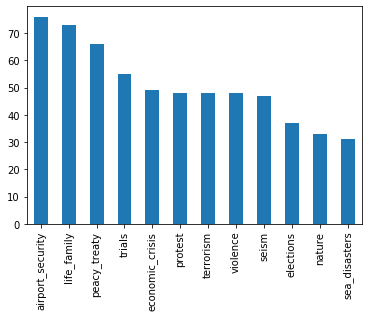

In [102]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

The topis are almost balanced, so we are good

In [103]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=bfa88b2667a896d5c2c2aa5ba5f0d3f2d7a34447f62d707991bb994f4d22aa16
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\3b\fb\41\e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=b7e6ed4de96bcb9aaa9d15d18831aa5861532310b3353a6beb7bb7e6cc44ccff
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\3c\33\97\805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built pyLDAvis funcy


In [104]:
import pyLDAvis

pyLDAvis.enable_notebook()

In [105]:
# %%time
import pyLDAvis.gensim
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.109561 -0.034202       1        1  10.584554
4     -0.035227 -0.018742       2        1  10.469298
11     0.056808 -0.020406       3        1  10.261782
0     -0.050681 -0.009046       4        1  10.015429
2     -0.031727  0.006116       5        1   9.439596
10     0.023066  0.026333       6        1   9.340072
8      0.009161  0.057391       7        1   8.143942
3      0.008244  0.022988       8        1   7.812334
6      0.048836 -0.042451       9        1   7.050725
9      0.008678 -0.033113      10        1   5.981282
5      0.007404  0.093903      11        1   5.706047
1      0.064998 -0.048771      12        1   5.194948, topic_info=           Term        Freq       Total Category  logprob  loglift
763       euros  148.000000  148.000000  Default  30.0000  30.0000
399        agua   69.000000   69.000000  Default  29.0000  29.0000
643  presidente  187.000000  187.000000  Default  28.0000  28.0000
590     delitos   95.000000   95.000000  Default  27.0000  27.0000
636     partido  114.000000  114.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
57      febrero    6.638974  100.764290  Topic12  -5.6091   0.2377
460       marzo    6.796609  134.582321  Topic12  -5.5856  -0.0283
310      semana    6.701159  125.546440  Topic12  -5.5998   0.0271
6          caso    6.298914  236.354355  Topic12  -5.6617  -0.6675
643  presidente    6.074093  187.696426  Topic12  -5.6980  -0.4733

[890 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.050731  abril
0         2  0.118373  abril
0         3  0.338208  abril
0         4  0.016910  abril
0         5  0.067642  abril
...     ...       ...    ...
286       7  0.036957  zonas
286       8  0.073913  zonas
286       9  0.055435  zonas
286      10  0.036957  zonas
286      11  0.166305  zonas

[3181 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 12, 1, 3, 11, 9, 4, 7, 10, 6, 2])